In [1]:
data<-read.csv('HealthIns.csv')

In [2]:
data

MedExpense,PublicIns,PrivateIns,Age,Female,Income,Illnesses,SSIratio,EducYr,Hisp,Black,Married,Urban,Priority
1,1,0,69,0,7.62500,1,0.9836066,12,0,0,1,1,1
2,0,1,73,1,3.75000,0,1.0000000,11,0,0,1,1,0
2,0,0,71,1,23.76200,3,0.3257301,12,0,0,1,1,1
2,0,0,90,0,9.42100,0,1.0000000,6,0,1,0,1,0
2,0,1,66,1,44.40000,1,0.2927928,13,0,0,0,1,1
2,1,0,75,1,52.15900,1,0.3461915,17,0,0,0,1,1
3,1,0,71,0,24.77320,0,0.2918476,12,0,0,1,1,0
3,1,0,70,0,49.83171,1,0.2408105,14,0,0,1,1,1
3,0,1,71,1,18.14200,2,0.0000000,12,0,0,1,1,1
3,1,0,69,0,40.10700,1,0.1795198,17,0,0,0,1,1


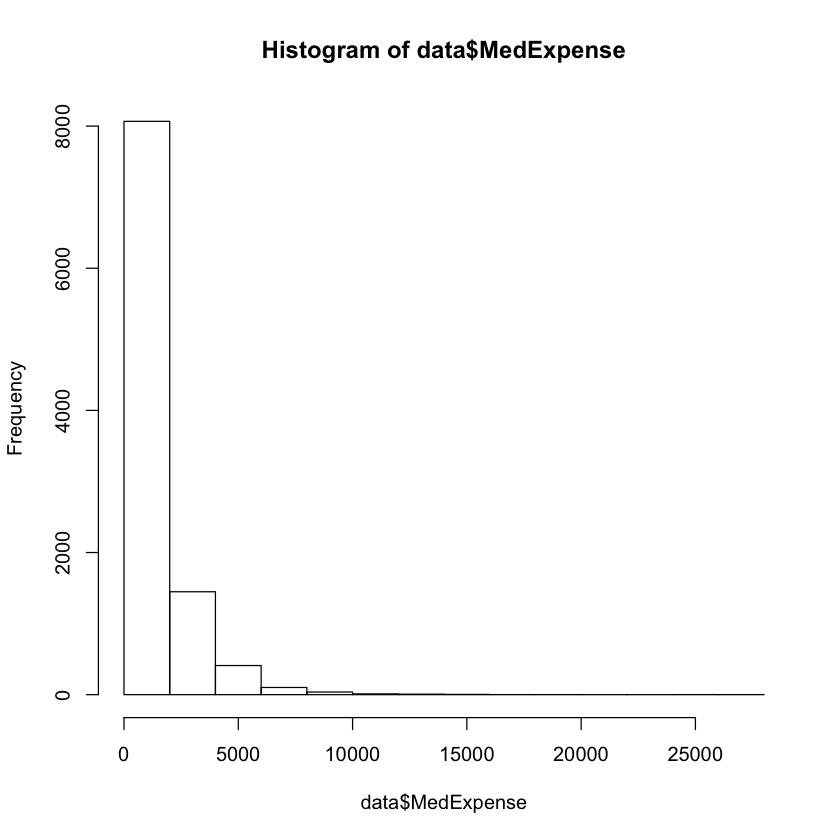

In [40]:
hist(data$MedExpense)

### No, it's not suitable for the linear regression, we have to apply tranformations. Log transformation is generally considered when keeping the any "amount " type.

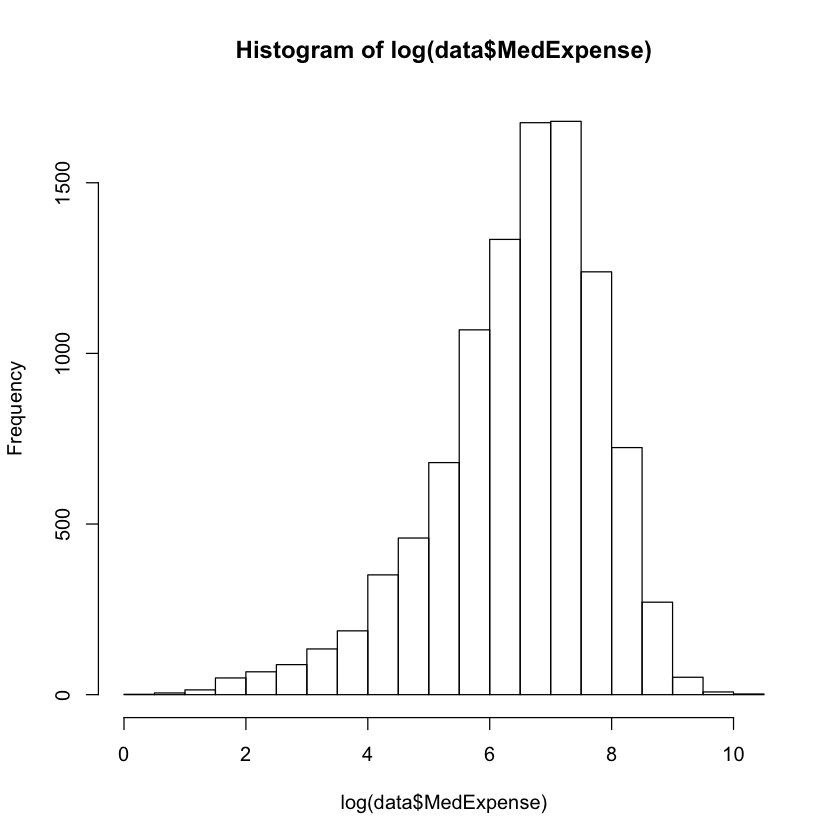

In [41]:
hist(log(data$MedExpense))

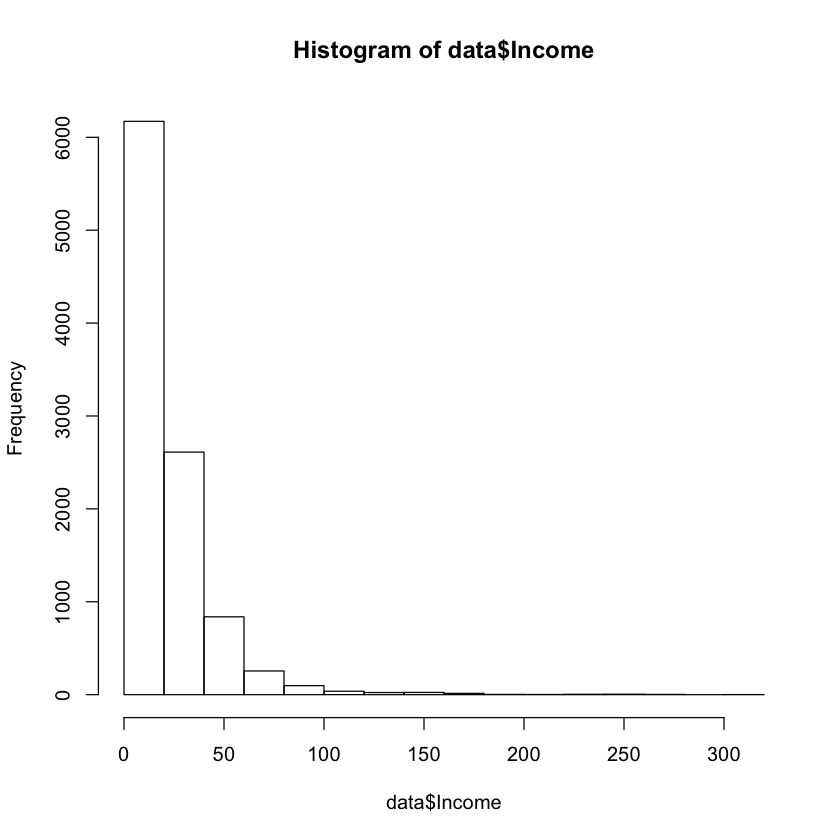

In [45]:
hist(data$Income)

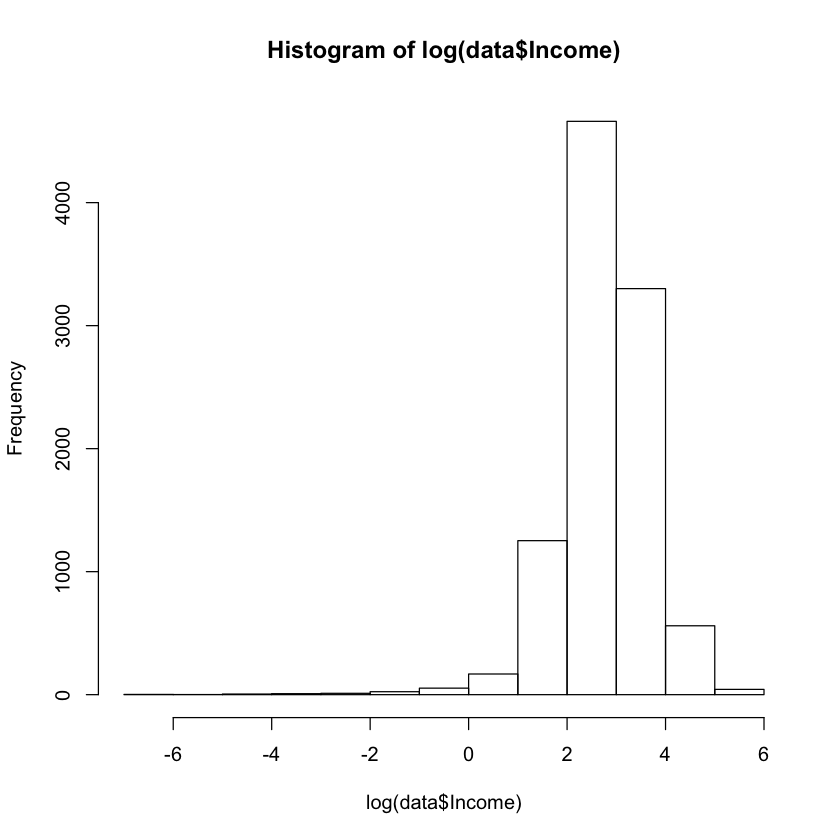

In [46]:
hist(log(data$Income))

## I think that number of illness, private and public insurance, Age, gender, SSI and income will affect the medical expenses.
### List of alternate hypothesis:
### 1) Number of illness has a significant effect on medical expenses.(positive)
### 2) If you have a private insurance, this will have a significant effect on medical expenses.(negative)
### 3) If you have a public insurance, this will have a significant effect on medical expenses.(positive)
### 4) Being a female will have significant effect of medical expense.(positive)
### 5) SSI is a program that provides cash assistance for people with low-income, so it will have a significant effect on medical expense.(negative)
### 6) People with more income can afford the medical expense, therefore it will have a significant effect on the medical expense. (positive)
### 7) Age will affect the medical expense.(positive)
### 8) Income and SSI ratio should have a significant interaction as SSI is for low income household and will have an affect on medical expense.

In [47]:
m1<-lm(log(MedExpense)~PrivateIns+PublicIns+Illnesses+Age+Female+log(Income)*SSIratio, data=data)

In [48]:
summary(m1)


Call:
lm(formula = log(MedExpense) ~ PrivateIns + PublicIns + Illnesses + 
    Age + Female + log(Income) * SSIratio, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.2735 -0.6674  0.1553  0.8432  3.6424 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           5.721838   0.155366  36.828  < 2e-16 ***
PrivateIns           -0.004911   0.032112  -0.153 0.878459    
PublicIns             0.096509   0.032583   2.962 0.003064 ** 
Illnesses             0.435771   0.009585  45.466  < 2e-16 ***
Age                  -0.003997   0.001891  -2.113 0.034597 *  
Female                0.051931   0.025175   2.063 0.039156 *  
log(Income)           0.018314   0.016834   1.088 0.276674    
SSIratio             -0.088597   0.081415  -1.088 0.276523    
log(Income):SSIratio  0.135871   0.035776   3.798 0.000147 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.235 on 10080 degrees of freedom
Mu

## The model is not good enough, Mutiple R-squared in very less for the model.

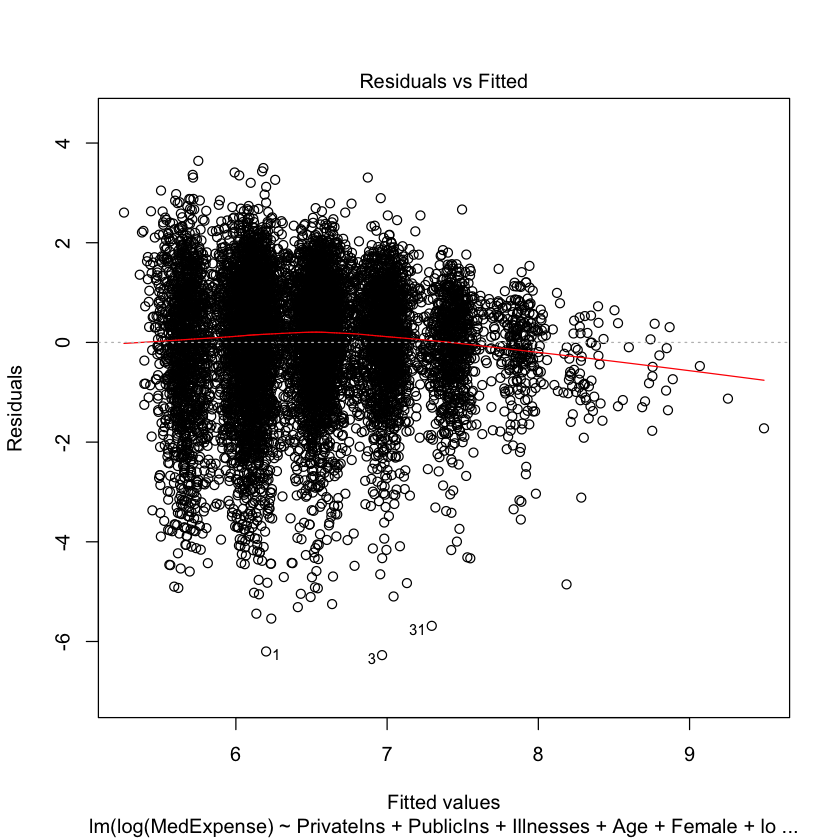

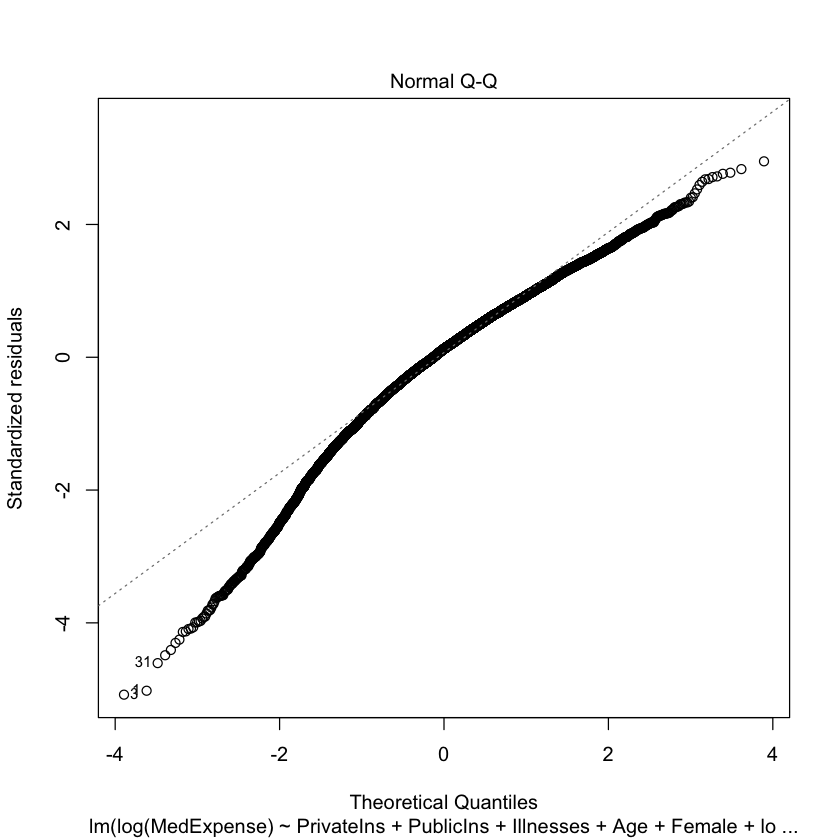

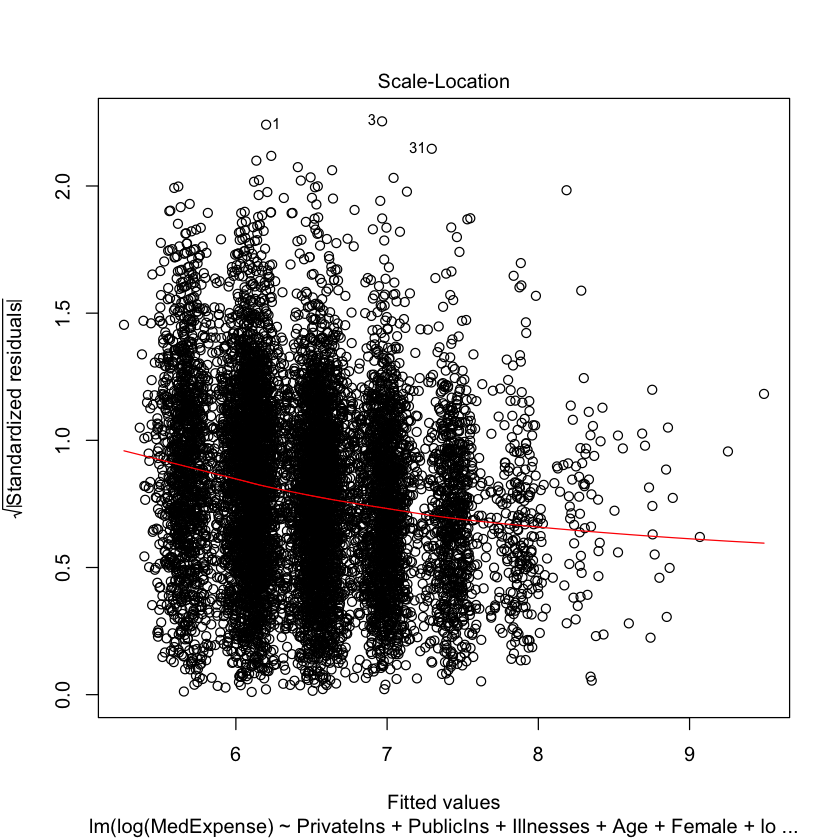

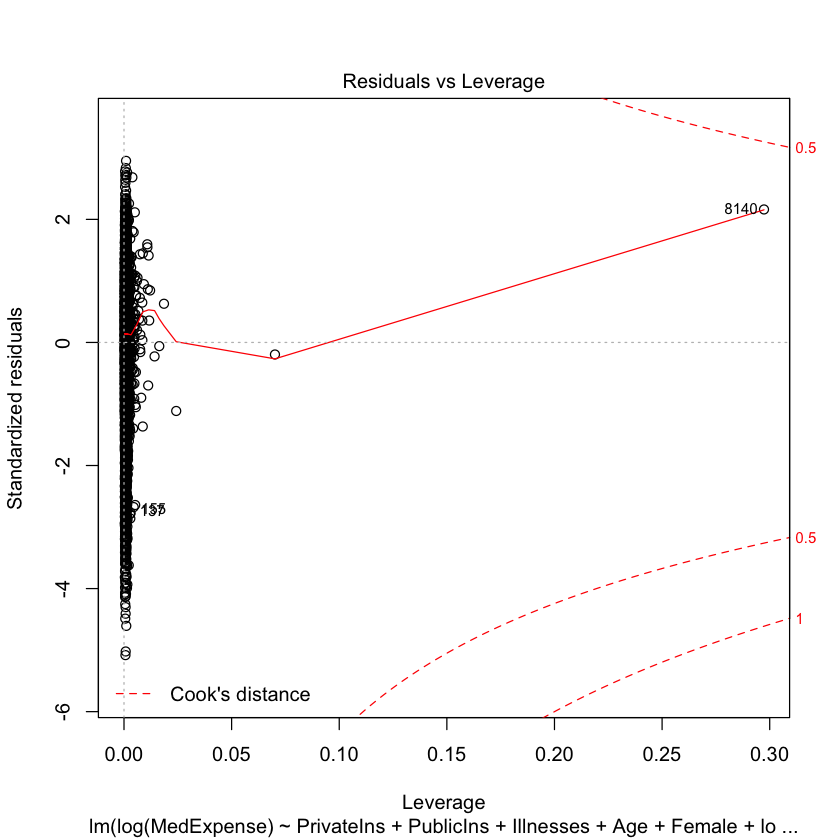

In [50]:
plot(m1)

In [51]:
bartlett.test(list(m1$res,m1$fit))


	Bartlett test of homogeneity of variances

data:  list(m1$res, m1$fit)
Bartlett's K-squared = 5382, df = 1, p-value < 2.2e-16


In [52]:
library(car)
vif(m1)

PrivateIns            PublicIns            Illnesses 
            1.596183             1.658110             1.015550 
                 Age               Female          log(Income) 
            1.056352             1.023129             1.562924 
            SSIratio log(Income):SSIratio 
            5.931028             4.991883

## Testing Assumptions:
### 1) Homoskedasticity: f you see residuals vs fitted values gaph, it doesn't seem to be passing the homoskedasticity test, it's not a cone shaped it seems but in bartlett test, p-value is less than 0.05, that means there are unequal variances for atleast two product lines
### 2) By looking at Normal Q-Q Plot, it's clear that it does not pass the normality test as well. The data is normal somewhere in the middle but not everywhere
### 3) There is no significant curvature in residuals vs fitted graph, so it's linear as well.
### 4) There is no multicollinearity in the variable as in the vif test, there is no value exceeding 10.
### 5) It fails independence test as we look at the residuals vs fitted value.

## Analysis Questions:
### 1) The difference in amount on medical expenditure of people insured and without insured is function of the medical expenditure right now. 
## d(MedicalExpense)/d(publicIns) = 0.096XmedicalExp or d(MedicalExpense)/d(privateIns) = -0.0049XMedicalExp
### 2) Yes, There is a difference between medical expenses for higher number of illness vs medical expense and it is again function of current medical expense.
## d(medicalexp)/d(illness) = 0.43XMedicalExp
### 3) Yes, females spent more than male on the medical expenses. After calculation according to the above model, it is again function of medical expense. 
## (med1-med2) = 0.12XMedicalExp
### 4) According to the above model, older people spends less than young people and it's a function of medical expense as well, 
## -0.0039XMedicalExp
### 5) I have not included the races in the model, therefore i cannot comment on this part.
### 6) This I have explained in the first point.
### 7) I have considered an interaction between income and ssi ratio that turned out to be significant. 
## d(medicalexp)/d(income) = (MedicalExp/Income)X(0.01+0.13*SSIRatio)
